<div align="center"> 
    <hr>
  <font size="6"><b>Dev | CCER with Tf-Idf</b> </font>
   <hr>
</div>

In [1]:
!python --version

Python 3.9.1


In [2]:
import os
import sys
import pandas as pd
import networkx
from networkx import draw, Graph
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from pyjedai.utils import (
    text_cleaning_method,
    print_clusters,
    print_blocks,
    print_candidate_pairs
)
from pyjedai.evaluation import Evaluation, write
from pyjedai.datamodel import Data
d1 = pd.read_csv("./data/ccer/D2/abt.csv", sep='|', engine='python')
d2 = pd.read_csv("./data/ccer/D2/buy.csv", sep='|', engine='python')
gt = pd.read_csv("./data/ccer/D2/gt.csv", sep='|', engine='python')

data = Data(
    dataset_1=d1,
    id_column_name_1='id',
    dataset_2=d2,
    id_column_name_2='id',
    ground_truth=gt
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Simple workflow

In [3]:
from pyjedai.block_building import StandardBlocking
from pyjedai.block_cleaning import BlockFiltering
from pyjedai.block_cleaning import BlockPurging
from pyjedai.comparison_cleaning import WeightedEdgePruning, WeightedNodePruning, CardinalityEdgePruning, CardinalityNodePruning
from pyjedai.matching import EntityMatching

sb = StandardBlocking()
blocks = sb.build_blocks(data)
sb.evaluate(blocks, with_classification_report=True)

cbbp = BlockPurging()
blocks = cbbp.process(blocks, data, tqdm_disable=False)
cbbp.evaluate(blocks, with_classification_report=True)

bf = BlockFiltering(ratio=0.8)
blocks = bf.process(blocks, data, tqdm_disable=False)

wep = CardinalityEdgePruning(weighting_scheme='X2')
candidate_pairs_blocks = wep.process(blocks, data)
wep.evaluate(candidate_pairs_blocks, with_classification_report=True)

Standard Blocking:   0%|          | 0/2152 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Standard Blocking
***************************************************************************************************************************
Method name: Standard Blocking
Parameters: 
Runtime: 0.6540 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.11% 
	Recall:        99.81%
	F1-score:       0.23%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1074
	False positives: 948081
	True negatives: 209693
	False negatives: 2
	Total comparisons: 949155
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Block Purging:   0%|          | 0/4264 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Block Purging
***************************************************************************************************************************
Method name: Block Purging
Parameters: 
	Smoothing factor: 1.025
	Max Comparisons per Block: 13920.0
Runtime: 0.1257 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.25% 
	Recall:        99.81%
	F1-score:       0.49%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1074
	False positives: 436832
	True negatives: 720942
	False negatives: 2
	Total comparisons: 437906
───────────────────────────────────────────────────────────────────────────────────────────

Block Filtering:   0%|          | 0/3 [00:00<?, ?it/s]

Cardinality Edge Pruning:   0%|          | 0/1076 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Cardinality Edge Pruning
***************************************************************************************************************************
Method name: Cardinality Edge Pruning
Parameters: 
	Node centric: False
	Weighting scheme: X2
Runtime: 25.3296 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      6.90% 
	Recall:        88.29%
	F1-score:      12.80%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 950
	False positives: 12817
	True negatives: 1144833
	False negatives: 126
	Total comparisons: 13767
──────────────────────────────────────────────────────────────────────────────────────

{'Precision %': 6.900559308491319,
 'Recall %': 88.2899628252788,
 'F1 %': 12.800646769520984,
 'True Positives': 950,
 'False Positives': 12817,
 'True Negatives': 1144833,
 'False Negatives': 126}

In [43]:
em = EntityMatching(metric='tf-idf', tokenizer = 'word_qgram_tokenizer', qgram=2, tfidf_similarity_metric='jaccard', similarity_threshold=0.0)
pairs_graph = em.predict(candidate_pairs_blocks, data)
em.evaluate(pairs_graph)

Entity Matching (tf-idf, word_qgram_tokenizer):   0%|          | 0/1064 [00:00<?, ?it/s]

C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: tf-idf
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_qgram_tokenizer
	Similarity metric: jaccard
	QGram size: 2
Runtime: 298.7000 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.11% 
	Recall:        79.55%
	F1-score:      14.72%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 8.111437505922487,
 'Recall %': 79.5539033457249,
 'F1 %': 14.721816149281969,
 'True Positives': 856,
 'False Positives': 9697,
 'True Negatives': 1147859,
 'False Negatives': 220}

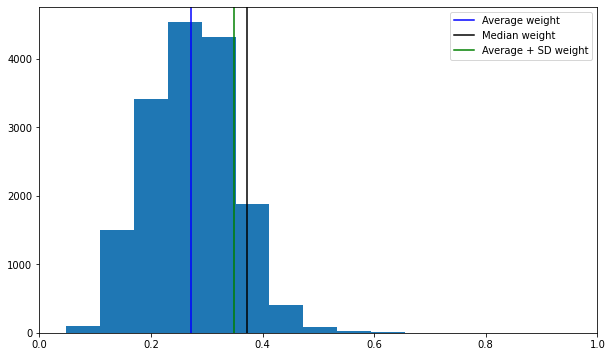

In [49]:
em.plot_distribution_of_all_weights()

Distribution-% of predicted scores:  [0.31344109151250693, 19.156782004793804, 43.19341159117448, 32.59172761354557, 4.31442443611333, 0.3933378403294204, 0.03687542253088316, 0.0, 0.0, 0.0]


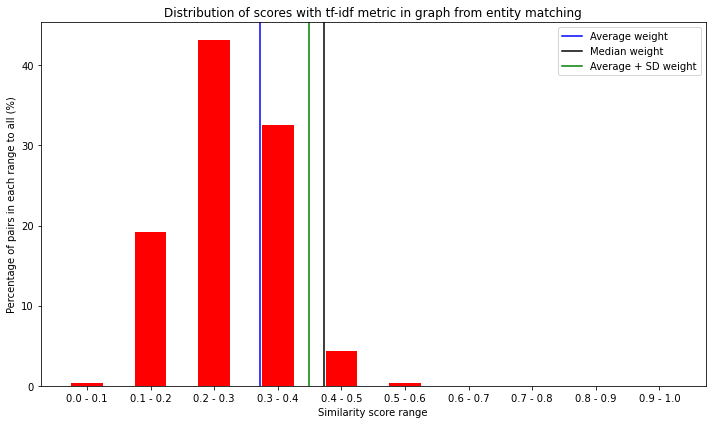

In [50]:
em.plot_distribution_of_scores()

In [51]:
from pyjedai.clustering import UniqueMappingClustering
umc = UniqueMappingClustering()
clusters = umc.process(pairs_graph, data)
umc.evaluate(clusters, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
Runtime: 0.2400 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     76.15% 
	Recall:        67.66%
	F1-score:      71.65%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 728
	False positives: 228
	True negatives: 1157200
	False negatives: 348
	Total comparisons: 956
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 76.15062761506276,
 'Recall %': 67.65799256505576,
 'F1 %': 71.65354330708661,
 'True Positives': 728,
 'False Positives': 228,
 'True Negatives': 1157200,
 'False Negatives': 348}

----

---

# Script with Optuna for fine-tuning tfidf



In [ ]:
import time
import optuna
import os
import sys
import pandas as pd
from pyjedai.datamodel import Data
from pyjedai.workflow import WorkFlow, compare_workflows
from pyjedai.block_building import StandardBlocking, QGramsBlocking, ExtendedQGramsBlocking, SuffixArraysBlocking, ExtendedSuffixArraysBlocking
from pyjedai.block_cleaning import BlockFiltering, BlockPurging
from pyjedai.comparison_cleaning import WeightedEdgePruning, WeightedNodePruning, CardinalityEdgePruning, CardinalityNodePruning, BLAST, ReciprocalCardinalityNodePruning, ReciprocalWeightedNodePruning, ComparisonPropagation
from pyjedai.matching import EntityMatching
from pyjedai.clustering import ConnectedComponentsClustering, UniqueMappingClustering
from optuna.study import MaxTrialsCallback
from optuna.trial import TrialState

db_name = "pyjedai_tfidf"
storage_name = "sqlite:///{}.db".format(db_name)

D1CSV = [
    "rest1.csv", "abt.csv", "amazon.csv", "dblp.csv",  "imdb.csv",  "imdb.csv",  "tmdb.csv",  "walmart.csv",   "dblp.csv",    "imdb.csv"
]
D2CSV = [
    "rest2.csv", "buy.csv", "gp.csv",     "acm.csv",   "tmdb.csv",  "tvdb.csv",  "tvdb.csv",  "amazon.csv",  "scholar.csv", "dbpedia.csv"
]
GTCSV = [
    "gt.csv",   "gt.csv",   "gt.csv",     "gt.csv",   "gt.csv", "gt.csv", "gt.csv", "gt.csv", "gt.csv", "gt.csv"
]
D = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9','D10']

separator = [
    '|', '|', '#', '\\%', '|', '|', '|', '|', '>', '|'
]
engine = [
    'python', 'python','python','python','python','python','python','python','python', None
]


for i in range(0,len(D1CSV)):
    print("\n\nDataset: ", D[i])

    d = D[i]
    d1 = D1CSV[i]
    d2 = D2CSV[i]
    gt = GTCSV[i]
    s = separator[i]
    e = engine[i]

    # Create a csv file 
    with open(d+'_tfidf_optuna_em.csv', 'w') as f:
        f.write('trial, metric, threshold, tokenizer, metric, qgram, precision, recall, f1, em_f1, runtime\n')
        data = Data(
            dataset_1=pd.read_csv("./data/ccer/" + d + "/" + d1 , 
                                sep=s,
                                engine=e,
                                na_filter=False).astype(str),
            id_column_name_1='id',
            dataset_2=pd.read_csv("./data/ccer/" + d + "/" + d2 , 
                                sep=s, 
                                engine=e, 
                                na_filter=False).astype(str),
            id_column_name_2='id',
            ground_truth=pd.read_csv("./data/ccer/" + d + "/gt.csv", sep=s, engine=e))

        if 'aggregated value' in data.attributes_1:
            data.dataset_1 = data.dataset_1.drop(columns=['aggregated value'], inplace=True)
        
        if 'aggregated value' in data.attributes_2:
            data.dataset_2 = data.dataset_2.drop(columns=['aggregated value'], inplace=True)

        title = d + "_tfidf_entity_matching"
        study_name = title  # Unique identifier of the study.

        '''
        OPTUNA objective function
        '''
        def objective(trial):
            try:
                t1 = time.time()
                sb = StandardBlocking()
                blocks = sb.build_blocks(data, tqdm_disable=False)

                cbbp = BlockPurging(smoothing_factor=1.0)
                blocks = cbbp.process(blocks, data, tqdm_disable=False)

                bf = BlockFiltering(ratio=0.8)
                blocks = bf.process(blocks, data, tqdm_disable=False)

                wep = CardinalityNodePruning(weighting_scheme='JS')
                candidate_pairs_blocks = wep.process(blocks, data, tqdm_disable=False)
                wep.evaluate(candidate_pairs_blocks)
                
                em = EntityMatching(metric='tf-idf', 
                                    tokenizer = trial.suggest_categorical("tokenizer", ["char_qgram_tokenizer", "word_qgram_tokenizer"]), 
                                    qgram=trial.suggest_int("qgram", 1, 5),
                                    tfidf_similarity_metric=trial.suggest_categorical("tfidf_similarity_metric", ["cosine", "jaccard", "dice"]), 
                                    similarity_threshold=0.0
                )
                pairs_graph = em.predict(candidate_pairs_blocks, data, tqdm_disable=False)
                em_results = em.evaluate(pairs_graph, data)
                
                thresholds = [em.get_weights_avg(), em.get_weights_median(), em.get_weights_avg()+em.get_weights_standard_deviation(), em.get_weights_median()+em.get_weights_standard_deviation()]
                
                ccc = UniqueMappingClustering()
                clusters = ccc.process(pairs_graph, data, similarity_threshold=trial.suggest_categorical("similarity_threshold", thresholds))

                results = ccc.evaluate(clusters, with_classification_report=True, verbose=True)

                t2 = time.time()
                f1, precision, recall = results['F1 %'], results['Precision %'], results['Recall %']

                f.write('{}, {}, {}, {}, {}, {},{}\n'.format(trial.number, em.metric, ccc.similarity_threshold, em.tokenizer, em.tfidf_similarity_metric, em.qgram, precision, recall, f1, em_results['F1 %'], t2-t1))
            
                return f1

            except ValueError as e:
                # Handle the exception and force Optuna to continue
                
                print(e)
                trial.set_user_attr("failed", True)
                f.write('{}, {}, {}, {}, {}, {},{}\n'.format(trial.number, str(e), None, None,None,None, None, None, None, None, None))
                return optuna.TrialPruned()
        
        study_name = title  # Unique identifier of the study.
        num_of_trials = 1
        study = optuna.create_study(
            directions=["maximize"],
            study_name=study_name,
            storage=storage_name,
            load_if_exists=False
        )
        print("Optuna trials starting")
        study.optimize(
            objective, 
            n_trials=num_of_trials, 
            show_progress_bar=True,
            callbacks=[MaxTrialsCallback(num_of_trials, states=(TrialState.COMPLETE,))]
        )
        print("Optuna trials finished")

    f.close()



Dataset:  D1


[I 2023-06-14 15:44:31,944] A new study created in RDB with name: D1_tfidf_entity_matching


Optuna trials starting


C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/1 [00:00<?, ?it/s]

Standard Blocking:   0%|          | 0/2595 [00:00<?, ?it/s]

Block Purging:   0%|          | 0/1214 [00:00<?, ?it/s]

Block Filtering:   0%|          | 0/3 [00:00<?, ?it/s]

Cardinality Node Pruning:   0%|          | 0/2595 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Cardinality Node Pruning
***************************************************************************************************************************
Method name: Cardinality Node Pruning
Parameters: 
	Node centric: True
	Weighting scheme: JS
Runtime: 0.1895 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      9.81% 
	Recall:       100.00%
	F1-score:      17.87%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Candidate pairs:  907


Entity Matching (tf-idf):   0%|          | 0/907 [00:00<?, ?it/s]

C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Tokenizer: char_qgram_tokenizer
	Metric: tf-idf
	Similarity Threshold: 0.0
Runtime: 316.7172 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     10.99% 
	Recall:       100.00%
	F1-score:      19.80%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering
***********

[I 2023-06-14 15:49:49,901] A new study created in RDB with name: D2_tfidf_entity_matching


Optuna trials starting


C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/1 [00:00<?, ?it/s]

Standard Blocking:   0%|          | 0/2152 [00:00<?, ?it/s]

Block Purging:   0%|          | 0/4264 [00:00<?, ?it/s]

Block Filtering:   0%|          | 0/3 [00:00<?, ?it/s]

Cardinality Node Pruning:   0%|          | 0/2152 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Cardinality Node Pruning
***************************************************************************************************************************
Method name: Cardinality Node Pruning
Parameters: 
	Node centric: True
	Weighting scheme: JS
Runtime: 1.1767 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.92% 
	Recall:        86.43%
	F1-score:      14.51%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Candidate pairs:  1939


Entity Matching (tf-idf):   0%|          | 0/1939 [00:00<?, ?it/s]

C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Tokenizer: char_qgram_tokenizer
	Metric: tf-idf
	Similarity Threshold: 0.0
Runtime: 94.6061 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.92% 
	Recall:        86.43%
	F1-score:      14.51%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering
************

[I 2023-06-14 15:51:27,570] A new study created in RDB with name: D3_tfidf_entity_matching


Optuna trials starting


C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/1 [00:00<?, ?it/s]

Standard Blocking:   0%|          | 0/4393 [00:00<?, ?it/s]

Block Purging:   0%|          | 0/13540 [00:00<?, ?it/s]

Block Filtering:   0%|          | 0/3 [00:00<?, ?it/s]

Cardinality Node Pruning:   0%|          | 0/4393 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Cardinality Node Pruning
***************************************************************************************************************************
Method name: Cardinality Node Pruning
Parameters: 
	Node centric: True
	Weighting scheme: JS
Runtime: 5.3291 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      1.72% 
	Recall:        81.32%
	F1-score:       3.36%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Candidate pairs:  4359


Entity Matching (tf-idf):   0%|          | 0/4359 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Tokenizer: char_qgram_tokenizer
	Metric: tf-idf
	Similarity Threshold: 0.0
Runtime: 15.2513 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      1.72% 
	Recall:        81.32%
	F1-score:       3.36%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering
************

[I 2023-06-14 15:51:54,842] A new study created in RDB with name: D4_tfidf_entity_matching


Optuna trials starting


C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/1 [00:00<?, ?it/s]

Standard Blocking:   0%|          | 0/4910 [00:00<?, ?it/s]

Block Purging:   0%|          | 0/14008 [00:00<?, ?it/s]

Block Filtering:   0%|          | 0/3 [00:00<?, ?it/s]

Cardinality Node Pruning:   0%|          | 0/4910 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Cardinality Node Pruning
***************************************************************************************************************************
Method name: Cardinality Node Pruning
Parameters: 
	Node centric: True
	Weighting scheme: JS
Runtime: 2.2168 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     11.16% 
	Recall:        99.69%
	F1-score:      20.07%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Candidate pairs:  4361


Entity Matching (tf-idf):   0%|          | 0/4361 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Tokenizer: char_qgram_tokenizer
	Metric: tf-idf
	Similarity Threshold: 0.0
Runtime: 5.1695 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     11.20% 
	Recall:        99.69%
	F1-score:      20.13%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering
*************

[I 2023-06-14 15:52:05,157] A new study created in RDB with name: D5_tfidf_entity_matching


Optuna trials starting


C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/1 [00:00<?, ?it/s]

Standard Blocking:   0%|          | 0/11174 [00:00<?, ?it/s]

Block Purging:   0%|          | 0/8536 [00:00<?, ?it/s]

Block Filtering:   0%|          | 0/3 [00:00<?, ?it/s]

Cardinality Node Pruning:   0%|          | 0/11174 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Cardinality Node Pruning
***************************************************************************************************************************
Method name: Cardinality Node Pruning
Parameters: 
	Node centric: True
	Weighting scheme: JS
Runtime: 3.8776 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.09% 
	Recall:        86.03%
	F1-score:      13.11%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Candidate pairs:  8899


Entity Matching (tf-idf):   0%|          | 0/8899 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Tokenizer: word_qgram_tokenizer
	Metric: tf-idf
	Similarity Threshold: 0.0
Runtime: 3.6573 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.47% 
	Recall:        86.03%
	F1-score:      13.75%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering
*************

[I 2023-06-14 15:52:16,811] A new study created in RDB with name: D6_tfidf_entity_matching


Optuna trials starting


C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/1 [00:00<?, ?it/s]

Standard Blocking:   0%|          | 0/12928 [00:00<?, ?it/s]

Block Purging:   0%|          | 0/6796 [00:00<?, ?it/s]

Block Filtering:   0%|          | 0/3 [00:00<?, ?it/s]

Cardinality Node Pruning:   0%|          | 0/12928 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Cardinality Node Pruning
***************************************************************************************************************************
Method name: Cardinality Node Pruning
Parameters: 
	Node centric: True
	Weighting scheme: JS
Runtime: 3.5760 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      3.04% 
	Recall:        77.43%
	F1-score:       5.85%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Candidate pairs:  10266


Entity Matching (tf-idf):   0%|          | 0/10266 [00:00<?, ?it/s]

C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
